In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro, probplot

In [ ]:
data=pd.read_csv("clean_data.csv")

 ## OLS vs. LinearRegression in Python: What's the Difference?

### 1. Select a Regression Target & Features: A continuous dependent variable (e.g. funding_total_usd)  Independent variables (e.g. funding_rounds, milestones, relationships, etc.)

In [26]:
import statsmodels.api as sm
import pandas as pd

# Your features and target
X = data[['funding_rounds', 'milestones', 'relationships']]
y = data['funding_total_usd_log']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame with original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)

# Add constant for intercept
X_train_scaled_df = sm.add_constant(X_train_scaled_df)

# Fit OLS model with DataFrame (with column names)
model = sm.OLS(y_train, X_train_scaled_df).fit()

print(model.summary())



                              OLS Regression Results                             
Dep. Variable:     funding_total_usd_log   R-squared:                       0.243
Model:                               OLS   Adj. R-squared:                  0.240
Method:                    Least Squares   F-statistic:                     78.24
Date:                   Thu, 15 May 2025   Prob (F-statistic):           6.74e-44
Time:                           10:11:03   Log-Likelihood:                -1374.2
No. Observations:                    735   AIC:                             2756.
Df Residuals:                        731   BIC:                             2775.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

## Explanation
More funding rounds and stronger relationships increase funding
A predictor is statistically significant if its p-value (P>|t|) is less than 0.05 (standard threshold).

funding_rounds: p = 0.000  ‚Üí significant ‚úÖ

milestones: p = 0.012 ‚Üí significant ‚úÖ

relationships: p = 0.000  ‚Üí significant ‚úÖ

Surprisingly, each additional milestone is associated with a decrease of about 0.17 units in the log of total funding

Intercept: 15.696371434538333
Coefficients:
  funding_rounds: 0.7289966353049786
  milestones: -0.1705945619924273
  relationships: 0.39270767524979605
R-squared on test set: 0.2894564644567734
MSE on test set: 2.1240819843329293


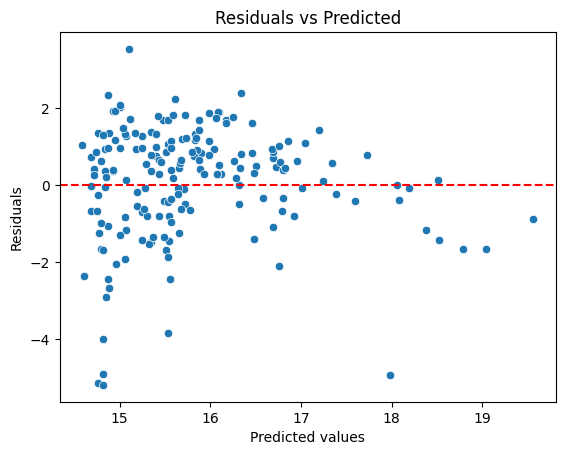

In [ ]:
# Features and target
X = data[['funding_rounds', 'milestones', 'relationships']]
y = data['funding_total_usd_log']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features (optional but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Print intercept and coefficients
print("Intercept:", lr_model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"  {feature}: {coef}")

# Predict on test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate
print("R-squared on test set:", r2_score(y_test, y_pred))
print("MSE on test set:", mean_squared_error(y_test, y_pred))

# Residual plot to check fit
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()



# Let‚Äôs perform the BLUE test to check if our linear regression model is reliable 

‚úÖ BLUE Assumptions Checklist
Assumption	How to Check (Method)
1. Linearity	Residuals vs. Fitted Plot
2. No Multicollinearity	Variance Inflation Factor (VIF)
3. Normality of Residuals	Histogram & Q-Q Plot of residuals
4. Homoscedasticity	Residuals vs. Fitted Plot / Breusch-Pagan test
5. No Autocorrelation	Durbin-Watson statistic

### 1. Linearity (residuals vs fitted)

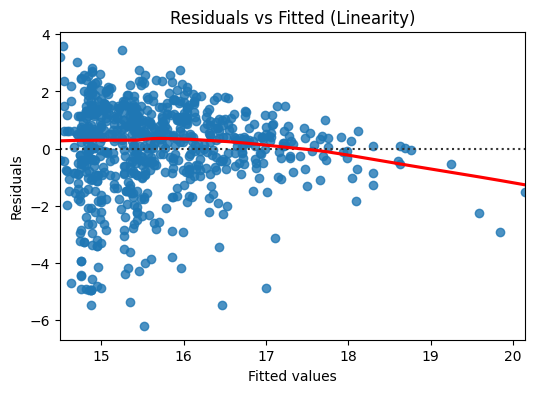

In [ ]:
plt.figure(figsize=(6, 4))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted (Linearity)')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

‚úÖ Interpretation:
Good: Residuals randomly scattered around zero ‚Üí Linearity assumption is satisfied.

Bad: Clear curves, funnels, or patterns ‚Üí Model may be missing non-linear relationships.

### 2. Multicollinearity (VIF)

In [ ]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("üîÅ VIF:\n", vif)

üîÅ VIF:
          Variable       VIF
0  funding_rounds  2.807799
1      milestones  3.273868
2   relationships  3.144262


#### VIF Value	Interpretation:<br>Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other.
##### < 5	&nbsp;&nbsp;&nbsp;No serious multicollinearity ‚úÖ<br>
##### 5‚Äì10&nbsp;&nbsp;&nbsp;Moderate concern ‚ö†Ô∏è<br>
##### > 10&nbsp;&nbsp;&nbsp;Serious multicollinearity ‚ùå<br><br>

### 3. Normality of Residuals

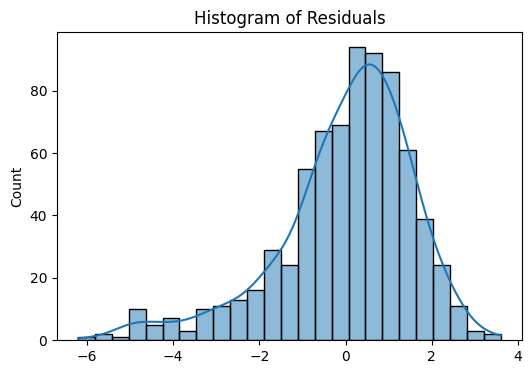

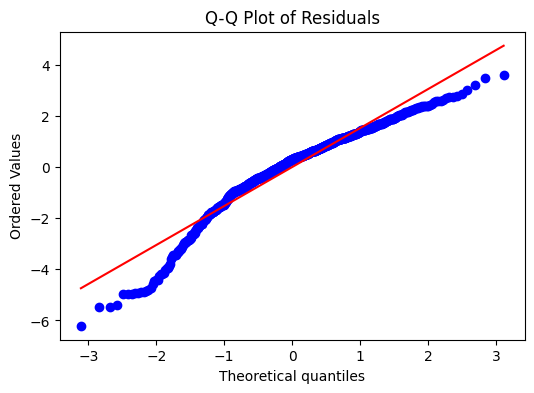

üìä Shapiro-Wilk Test: W=0.9381, p-value=0.0000 -> Not normal


In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.show()
plt.figure(figsize=(6, 4))
#Q-Q Plot
probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()
# Shapiro-Wilk test (normality)
stat, p = shapiro(model.resid)
print(f'üìä Shapiro-Wilk Test: W={stat:.4f}, p-value={p:.4f} -> {"Normal" if p>0.05 else "Not normal"}')

‚úÖ Interpretation:
Histogram: Should resemble a bell curve (normal distribution).if histogram looks somewhat bell-shaped but is skewed, it means the residuals aren't perfectly normal 

Q-Q Plot: Points should lie on the diagonal line.(A Q-Q plot compares the distribution of your residuals to a normal distribution.)

Shapiro-Wilk Test:

p > 0.05 ‚Üí Residuals are normally distributed ‚úÖ

p < 0.05 ‚Üí Residuals not normal ‚ùå (affects inference validity)

### 4.Homoscedasticity

In [34]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming you already have X_train_scaled and model fitted on X_train_scaled
# Add a constant column to X_train_scaled before the test
X_train_const = sm.add_constant(X_train_scaled)

bp_test = het_breuschpagan(model.resid, X_train_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print('Breusch-Pagan test:')
for name, value in zip(labels, bp_test):
    print(f'{name}: {value:.4f}')


Breusch-Pagan test:
Lagrange multiplier statistic: 44.6108
p-value: 0.0000
f-value: 15.7450
f p-value: 0.0000


‚úÖ Interpretation:<br>
Homoscedasticity means that the variance of the residuals (errors) is constant across all levels of the independent variables in a regression model.
Why is constant variance of residuals (homoscedasticity) good in a regression model?It ensures reliable inference<br><br>
p > 0.05 ‚Üí Variance of residuals is constant (homoscedasticity) ‚úÖ

p < 0.05 ‚Üí Heteroscedasticity detected ‚ùå (violates assumption)

### 5. Autocorrelation (Durbin-Watson)

In [ ]:
dw = sm.stats.durbin_watson(residuals)
print(f'üìê Durbin-Watson: {dw:.4f} (Ideal ~2)')


üìê Durbin-Watson: 1.9972 (Ideal ~2)


Autocorrelation refers to the correlation of residuals (errors) with each other over time or order.

‚úÖ In a good regression model:
Residuals (errors) should be independent ‚Äî meaning:

The error you make on one observation should not influence the error you make on another.If residuals influence each other, your model is biased in estimating standard errors.

Value ‚âà 2 ‚Üí No autocorrelation

< 2 ‚Üí Positive autocorrelation

2 ‚Üí Negative autocorrelation